In [1]:
#This program performs a Stochastic Simulation Algorithm on birth-death process for multiple observations
# 0 -> X -> 0
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializations here
nt=3000                       #indicates the number of reactions to consider
M=50                          #number of individuals
trueA=5                      #birth parameter
trueB=0.2                    #death parameter
N=30                         #number of unit intervals to consider in subsampling
x=np.zeros((nt+1,M))          #molecule count 
t_x=np.zeros((nt+1,M))        #reaction time of fully-observed trajectory
A=np.zeros(M)                 #birth parameter samples 
B=np.zeros(M)                 #death parameter samples
x[0,0:M]=0                 #initial molecule count
t_x[0,0:M]=0                  #initial time of fully-observed trajectory 
v=np.array([1, -1 ])          #reaction vectors

In [3]:
#Perform the iteration
for l in range(M):
    xx=np.zeros((nt+1))           #dummy variable for molecule count 
    t_xx=np.zeros((nt+1))         #dummy variable for reaction time 
    xx[0]=x[0,l]
    A[l]=np.random.gamma(trueA*5,1/5)    #(25,5)
    B[l]=np.random.gamma(trueB*10,1/10)    #(2,10)
    for i in range(nt):
        a=np.array([A[l], B[l]*xx[i]] )
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        dummy=len(cumsum_a)-1
        for k in range(2):
            if cumsum_a[k]>epsilon[0]*sum_a and k<=dummy:
                dummy=k 
        j=dummy               
        tau=(np.log(1/epsilon[1]))/sum_a
        xx[i+1]=xx[i]+v[j]
        t_xx[i+1]=t_xx[i]+tau
    x[:,l]=xx
    t_x[:,l]=t_xx

In [4]:
#subsample the trajectory on unit intervals
y=np.zeros((N+1,M))
y[0,0:M]=x[0,0:M]
for l in range(M):
    for i in range(1,N+1):
            for k in range(nt+1): 
                if t_x[k,l]>i-1 and t_x[k,l]<i:
                    y[i,l]=x[k,l];           

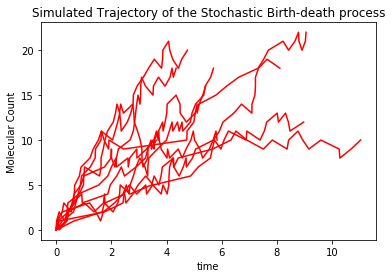

In [5]:
#plot the trajectory
plt.plot(t_x[0:35,0:10],x[0:35,0:10],'r')
plt.title('Simulated Trajectory of the Stochastic Birth-death process')
plt.xlabel('time')
plt.ylabel('Molecular Count')
plt.show()

In [6]:
#save the simulated values into .csv files
columns=' ' 
#np.savetxt("full.csv", x, delimiter=",",header=columns)
#np.savetxt("full_time.csv", t_x, delimiter=",",header=columns)
np.savetxt("subsampled.csv", y, delimiter=",",header=columns)

np.save("A.npy",A)
np.save("B.npy",B)

In [7]:
print(np.mean(A))
print(np.var(A))
print(np.mean(B))
print(np.var(B))

4.8059126179214395
0.594450662821761
0.17789514299731374
0.013345145913908132


In [ ]:
true_A=np.load("A.npy")
true_B=np.load("B.npy")
columns=' '
np.savetxt("true_A.csv", true_A, delimiter=",",header=columns)
np.savetxt("B6.csv", true_B, delimiter=",",header=columns)